In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [3]:
np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

In [4]:
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


In [15]:
 X[:, np.newaxis]

array([[0.0202184 ],
       [0.07103606],
       [0.0871293 ],
       [0.11827443],
       [0.14335329],
       [0.38344152],
       [0.41466194],
       [0.4236548 ],
       [0.43758721],
       [0.46147936],
       [0.52184832],
       [0.52889492],
       [0.54488318],
       [0.5488135 ],
       [0.56804456],
       [0.60276338],
       [0.63992102],
       [0.64589411],
       [0.71518937],
       [0.77815675],
       [0.78052918],
       [0.79172504],
       [0.79915856],
       [0.83261985],
       [0.87001215],
       [0.891773  ],
       [0.92559664],
       [0.94466892],
       [0.96366276],
       [0.97861834]])

In [16]:
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

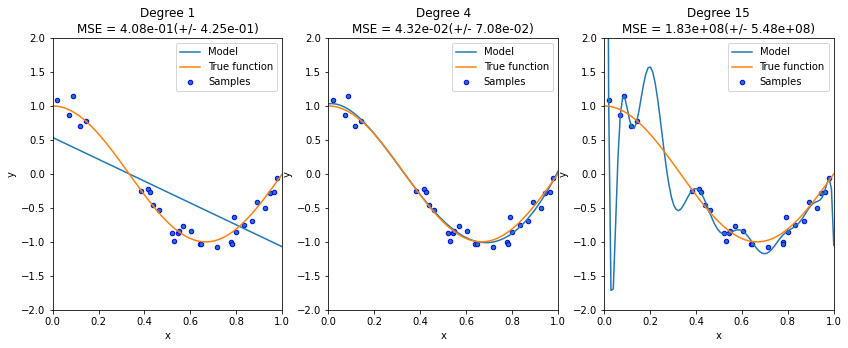

In [11]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)
    # X[:, np.newaxis] vector columna

    # Evaluate the models using crossvalidation
    # X[:, np.newaxis], y parámetros de entrada 
    scores = 
    
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()